In [201]:
import pandas as pd
import numpy as np

# =========================
# 1. Load data
# =========================
df_raw = pd.read_csv("./data/raw/financial_report_bank_quarterly.csv")
df = df_raw.copy()

# ============================
# 2. Remove existing z_score
# ============================
for col in df.columns:
    if col in ["ZSCORE"]:    
        df = df.drop(columns=[col])

# Check data
df.head()

,symbol,calendarYear,period,time,Size,DER,DAR,ROA,ROE,SDOA,SDROE,Tobinq,PPE,Cash,AR,Log_Sales,SGR,operatingIncomeRatio
0,AGRO.JK,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,0.000551,0.501982,0.016406,0.102357,0.005095,25.764395,0.004025,-0.266365
1,AGRO.JK,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,0.000210,0.367396,0.028464,0.115185,0.006752,26.305030,0.003185,-0.327832
2,AGRO.JK,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,0.000553,0.529662,0.030477,0.086416,0.000000,26.295740,0.002681,0.108593
3,AGRO.JK,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,0.000624,0.569790,0.030970,0.090348,0.000000,26.178936,0.002838,-0.070020
4,AGRO.JK,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,0.000122,0.549454,0.021044,0.100950,0.004835,25.589815,0.001589,0.109110


In [202]:
# =========================
# 3. Standardize column names
# - trim spasi
# - sisip underscore sebelum huruf besar (camelCase → snake_case)
# - lowercase
# - ganti spasi & titik jadi underscore
# =========================
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True)  # camelCase -> snake_case
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('.', '_')
)

# =========================
# 4. Hapus suffix ".JK" di akhir symbol
# =========================
df["symbol"] = df["symbol"].str.replace(".JK", "", regex=False)


# =========================
# 5. Extract quarter from period
# =========================
df['quarter'] = df['period'].str.extract(r'Q(\d)').astype(int)


# =========================
# 6. Make sure numeric column becomes float
# (pakai nama kolom SETELAH di-normalisasi)
# =========================
num_cols = [
    'calendar_year', 'size', 'der', 'dar', 'roa', 'roe', 'sdoa', 'sdroe',
    'tobinq', 'ppe', 'cash', 'ar', 'log_sales', 'sgr',
    'operating_income_ratio', 'quarter'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Validasi kolom di df
num_cols = [c for c in num_cols if c in df.columns]

print(df.dtypes)
df.head(10)

symbol                     object
calendar_year               int64
period                     object
time                       object
size                      float64
der                       float64
dar                       float64
roa                       float64
roe                       float64
sdoa                      float64
sdroe                     float64
tobinq                    float64
ppe                       float64
cash                      float64
ar                        float64
log_sales                 float64
sgr                       float64
operating_income_ratio    float64
quarter                     int64
dtype: object


,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,sdroe,tobinq,ppe,cash,ar,log_sales,sgr,operating_income_ratio,quarter
0,AGRO,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,0.000551,0.501982,0.016406,0.102357,0.005095,25.764395,0.004025,-0.266365,3
1,AGRO,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,0.000210,0.367396,0.028464,0.115185,0.006752,26.305030,0.003185,-0.327832,2
2,AGRO,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,0.000553,0.529662,0.030477,0.086416,0.000000,26.295740,0.002681,0.108593,1
3,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,0.000624,0.569790,0.030970,0.090348,0.000000,26.178936,0.002838,-0.070020,4
4,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,0.000122,0.549454,0.021044,0.100950,0.004835,25.589815,0.001589,0.109110,3
5,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,0.003565,0.665256,0.023234,0.126763,0.005011,25.663972,0.001438,0.748114,2
6,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,0.005456,0.630988,0.023374,0.133398,0.004421,25.750278,0.001289,0.859516,1
7,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,0.008533,0.480222,0.021719,0.153328,0.008173,25.901136,-0.006162,0.531961,4
8,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,0.013549,0.811311,0.013106,0.101587,0.007046,25.750917,0.007181,0.604808,3
9,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,0.234602,0.853622,0.010696,0.212144,0.004904,25.987949,-0.013298,0.302642,2


In [203]:
# ============================
# 7. Count Bank Z-Score
# ============================

# Equity-to-Assets ratio (E/A) ≈ 1 - DAR
df["equity_to_assets"] = 1 - df["dar"]

# Std dev ROA per bank (per symbol)
df["roa_std_bank"] = (
    df.groupby("symbol")["roa"]
      .transform("std")
)

# Bank Stability Z-Score:
# bank_zscore = (ROA + E/A) / σ(ROA)
df["bank_zscore"] = (df["roa"] + df["equity_to_assets"]) / df["roa_std_bank"]

# Hindari pembagian 0 / NaN (misal bank baru punya 1 periode data)
mask_bad = df["roa_std_bank"].isna() | (df["roa_std_bank"] == 0)
df.loc[mask_bad, "bank_zscore"] = np.nan

df[["symbol", "calendar_year", "quarter", "roa", "dar", "roa_std_bank", "bank_zscore"]].head(100)

,symbol,calendar_year,quarter,roa,dar,roa_std_bank,bank_zscore
0,AGRO,2024,3,0.001081,0.087195,0.016421,55.654903
1,AGRO,2024,2,0.000830,0.051464,0.016421,57.815672
2,AGRO,2024,1,0.000748,0.038061,0.016421,58.626912
3,AGRO,2023,4,0.000778,0.043646,0.016421,58.288587
4,AGRO,2023,3,0.000472,0.008067,0.016421,60.436650
...,...,...,...,...,...,...,...
95,AGRS,2013,2,0.000000,0.015381,0.007610,129.382846
96,AGRS,2013,1,0.002958,0.031170,0.007610,127.696786
97,AGRS,2012,4,-0.000731,0.031170,0.007610,127.212113
98,AMAR,2024,3,0.011690,0.053354,0.010824,88.539972


count    2367.000000
mean      458.148501
std       364.779199
min        25.951496
25%       121.295501
50%       413.631565
75%       650.999162
max      2014.114912
Name: bank_zscore, dtype: float64


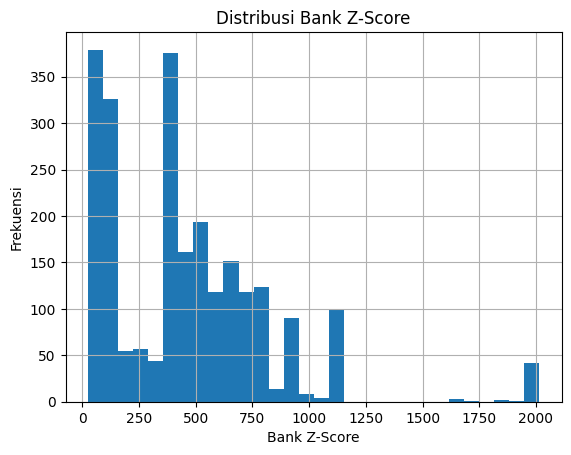

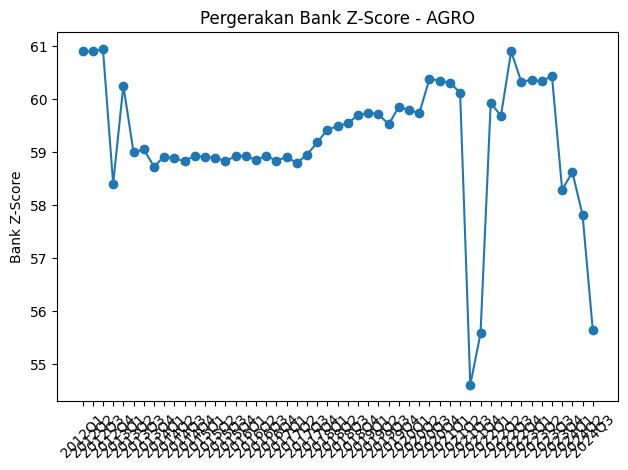

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 8. Cek Distribusi Bank Z-Score
# ============================

# Cek ringkasan statistik Bank Z-Score
print(df["bank_zscore"].describe())

# Melihat distribusi Bank Z-Score
plt.figure()
df["bank_zscore"].hist(bins=30)
plt.xlabel("Bank Z-Score")
plt.ylabel("Frekuensi")
plt.title("Distribusi Bank Z-Score")
plt.show()

# Ambil sample time series per 1 bank (ex. AGRO)
sample_symbol = df["symbol"].iloc[0]
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

In [205]:
# ============================
# 9. Cek Anomali Distribusi Bank Z-Score
# ============================

# Cek 10 nilai terbesar & terkecil
top10 = df.nlargest(10, "bank_zscore")[["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]]
bottom10 = df.nsmallest(10, "bank_zscore")[["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]]

print("TOP 10 Bank Z-Score:", top10)
print("BOTTOM 10 Bank Z-Score:", bottom10)

TOP 10 Bank Z-Score:      symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
2200   NOBU  2013Q4  2014.114912  0.001994          1.000000      0.000497
2159   NOBU  2024Q1  2013.271465  0.001748          0.999827      0.000497
2161   NOBU  2023Q3  2012.910416  0.001683          0.999712      0.000497
2173   NOBU  2020Q3  2012.846132  0.001363          1.000000      0.000497
2181   NOBU  2018Q3  2012.754512  0.001318          1.000000      0.000497
2174   NOBU  2020Q2  2012.740187  0.001311          1.000000      0.000497
2196   NOBU  2014Q4  2012.663289  0.001272          1.000000      0.000497
2175   NOBU  2020Q1  2012.637931  0.001260          1.000000      0.000497
2205   NOBU  2012Q3  2012.604898  0.001243          1.000000      0.000497
2190   NOBU  2016Q2  2012.549561  0.001216          1.000000      0.000497
BOTTOM 10 Bank Z-Score:     symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
337   BANK  2013Q3    25.951496  0.009422          0.732

In [206]:
# Cek apakah nilai Bank Z-Score yang besar, bukan karena ROA yang besar,
# namun karena std ROA yang sangat kecil

sus = df[df["bank_zscore"] > df["bank_zscore"].quantile(0.99)][
    ["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]
]
print("Sus > P99:", sus.head(20))

Sus > P99:      symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
2159   NOBU  2024Q1  2013.271465  0.001748          0.999827      0.000497
2161   NOBU  2023Q3  2012.910416  0.001683          0.999712      0.000497
2162   NOBU  2023Q2  2012.300748  0.001382          0.999710      0.000497
2163   NOBU  2023Q1  2012.078431  0.001309          0.999672      0.000497
2164   NOBU  2022Q4  2011.978791  0.001285          0.999647      0.000497
2165   NOBU  2022Q3  2011.952144  0.001322          0.999596      0.000497
2173   NOBU  2020Q3  2012.846132  0.001363          1.000000      0.000497
2174   NOBU  2020Q2  2012.740187  0.001311          1.000000      0.000497
2175   NOBU  2020Q1  2012.637931  0.001260          1.000000      0.000497
2176   NOBU  2019Q4  2011.980743  0.000933          1.000000      0.000497
2177   NOBU  2019Q3  2012.452123  0.001167          1.000000      0.000497
2178   NOBU  2019Q2  2011.901643  0.000893          1.000000      0.000497
2181   NOBU  2

count    2367.000000
mean      458.148501
std       364.779199
min        25.951496
25%       121.295501
50%       413.631565
75%       650.999162
max      2014.114912
Name: bank_zscore, dtype: float64
Lower bound (IQR): -673.2599893168835
Upper bound (IQR): 1445.5546525166656
Jumlah outlier (IQR): 49


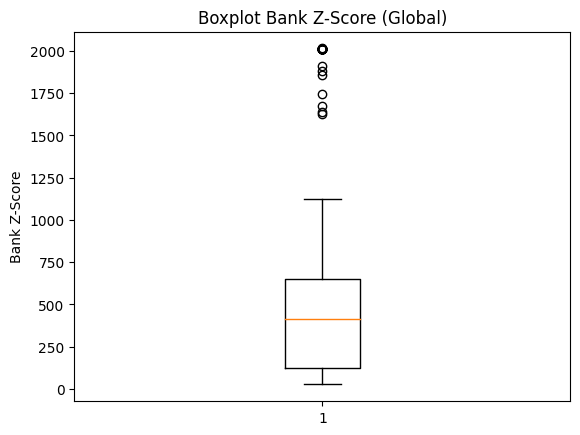

In [207]:
# ============================
# 10. Cek Anomali Distribusi Bank Z-Score menggunakan IQR
# ============================

# Cek Outlier Bank Z-Score

import numpy as np
import matplotlib.pyplot as plt

print(df["bank_zscore"].describe())

# IQR rule
Q1 = df["bank_zscore"].quantile(0.25)
Q3 = df["bank_zscore"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower bound (IQR):", lower)
print("Upper bound (IQR):", upper)

outliers_iqr = df[(df["bank_zscore"] < lower) | (df["bank_zscore"] > upper)]
print("Jumlah outlier (IQR):", len(outliers_iqr))

# Visualisasi Boxplot
plt.figure()
plt.boxplot(df["bank_zscore"].dropna(), vert=True)
plt.ylabel("Bank Z-Score")
plt.title("Boxplot Bank Z-Score (Global)")
plt.show()

In [208]:
# Karena Mean 458.148501 > Median 413.631565
# Ekor atas lebih panjang (Jumlah Q3 651, sedangkan Max nya 2014, selisih = 1363)
# Ekor bawah lebih pendek (Jumlah Min nya 26, sedangkan Q1 121, selisih = 95)
# => Distribusinya right-skewed

In [209]:
# Fisher-Pearson Skewness Coef
sk = df["bank_zscore"].skew() 
print(sk)

1.5843424823730468


In [210]:
# Cek anomali bank_zscore dari Upper Bound IQR, terhadap ROA

df["roa_count_bank"] = df.groupby("symbol")["roa"].transform("count")

top_outliers = (
    df[df["bank_zscore"] > 1445.5546]  # berdasarkan Upper Bound IQR
      .sort_values("bank_zscore", ascending=False)
      [[
          "symbol", "time",
          "bank_zscore",
          "roa",
          "equity_to_assets",   # 1 - dar
          "roa_std_bank",
          "roa_count_bank",
      ]]
)

print(top_outliers.head(10))
print("Jumlah outlier (IQR):", len(top_outliers))

df.head(10)

     symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank  \
2200   NOBU  2013Q4  2014.114912  0.001994          1.000000      0.000497   
2159   NOBU  2024Q1  2013.271465  0.001748          0.999827      0.000497   
2161   NOBU  2023Q3  2012.910416  0.001683          0.999712      0.000497   
2173   NOBU  2020Q3  2012.846132  0.001363          1.000000      0.000497   
2181   NOBU  2018Q3  2012.754512  0.001318          1.000000      0.000497   
2174   NOBU  2020Q2  2012.740187  0.001311          1.000000      0.000497   
2196   NOBU  2014Q4  2012.663289  0.001272          1.000000      0.000497   
2175   NOBU  2020Q1  2012.637931  0.001260          1.000000      0.000497   
2205   NOBU  2012Q3  2012.604898  0.001243          1.000000      0.000497   
2190   NOBU  2016Q2  2012.549561  0.001216          1.000000      0.000497   

      roa_count_bank  
2200              49  
2159              49  
2161              49  
2173              49  
2181              49  
217

,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,...,cash,ar,log_sales,sgr,operating_income_ratio,quarter,equity_to_assets,roa_std_bank,bank_zscore,roa_count_bank
0,AGRO,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,...,0.102357,0.005095,25.764395,0.004025,-0.266365,3,0.912805,0.016421,55.654903,51
1,AGRO,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,...,0.115185,0.006752,26.305030,0.003185,-0.327832,2,0.948536,0.016421,57.815672,51
2,AGRO,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,...,0.086416,0.000000,26.295740,0.002681,0.108593,1,0.961939,0.016421,58.626912,51
3,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,...,0.090348,0.000000,26.178936,0.002838,-0.070020,4,0.956354,0.016421,58.288587,51
4,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,...,0.100950,0.004835,25.589815,0.001589,0.109110,3,0.991933,0.016421,60.436650,51
5,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,...,0.126763,0.005011,25.663972,0.001438,0.748114,2,0.990338,0.016421,60.335679,51
6,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,...,0.133398,0.004421,25.750278,0.001289,0.859516,1,0.990938,0.016421,60.368415,51
7,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,...,0.153328,0.008173,25.901136,-0.006162,0.531961,4,0.992048,0.016421,60.322850,51
8,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,...,0.101587,0.007046,25.750917,0.007181,0.604808,3,0.998713,0.016421,60.900981,51
9,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,...,0.212144,0.004904,25.987949,-0.013298,0.302642,2,0.982304,0.016421,59.685494,51


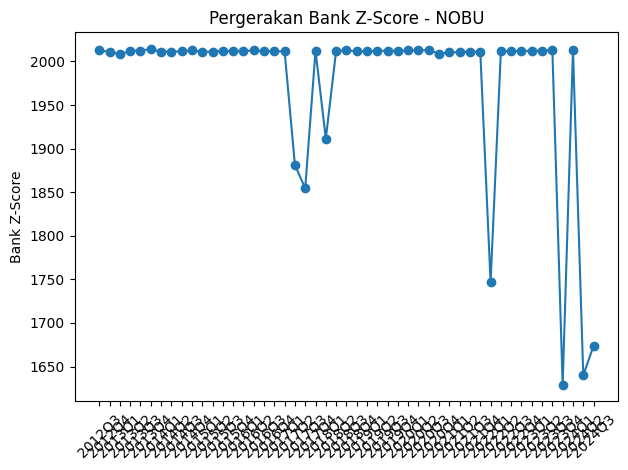

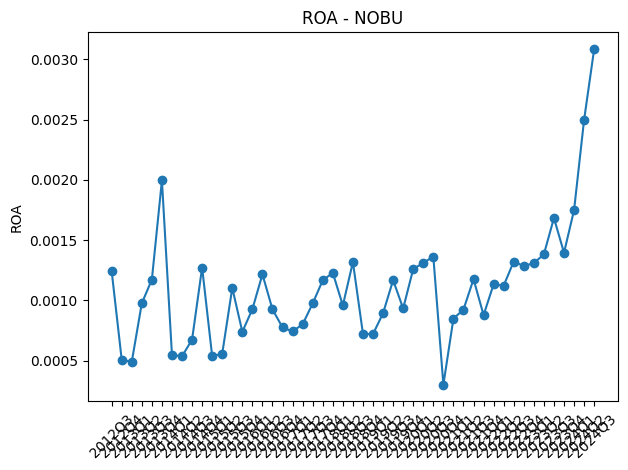

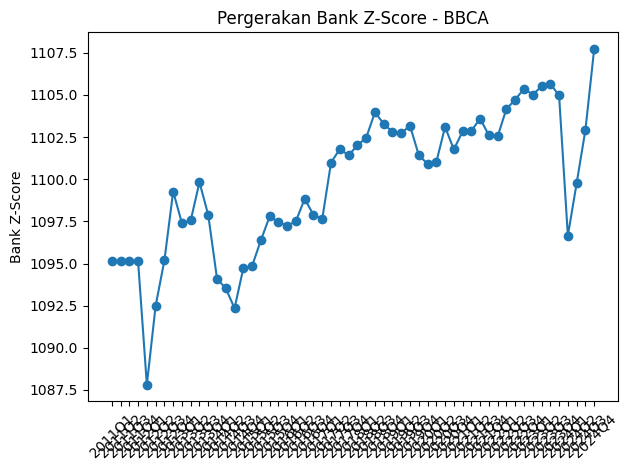

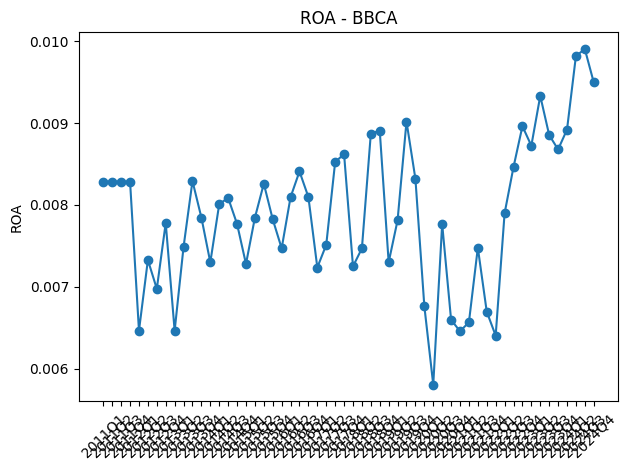

In [211]:
# => Terlihat data yang memiliki anomali pada ROA adalah NOBU

# Ambil sample time series per 1 bank (ex. NOBU)
sample_symbol = 'NOBU'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

sample_symbol = 'NOBU'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["roa"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("ROA")
plt.title(f"ROA - {sample_symbol}")
plt.tight_layout()
plt.show()

# Ambil sample time series per 1 bank (ex. BBCA)
sample_symbol = 'BBCA'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

sample_symbol = 'BBCA'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["roa"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("ROA")
plt.title(f"ROA - {sample_symbol}")
plt.tight_layout()
plt.show()

In [212]:
# Cek summary value Bank Z-Score per Bank Symbol (Before Handle Data Anomali)

summary = (
    df.groupby("symbol")
      .agg(
          bank_z_min=("bank_zscore", "min"),
          bank_z_max=("bank_zscore", "max"),
          n_obs=("bank_zscore", "count"),
          bank_z_mean=("bank_zscore", "mean"),
          bank_z_std=("bank_zscore", "std"),
          roa_std=("roa", "std"),
      )
      .sort_values("bank_z_max", ascending=False)
)
summary.head(20)
summary.tail(20)

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
BBRI,357.016594,391.303535,58,375.109378,8.396794,0.002556
MAYA,354.478951,374.174136,55,363.983466,4.641842,0.002693
BTPN,263.253438,369.075091,57,322.692290,31.413106,0.002709
MEGA,303.927997,367.910815,55,362.932052,10.650420,0.002742
BBSI,271.649643,276.320237,43,273.205913,0.938364,0.003681
BNLI,193.287368,208.091984,55,200.189341,3.243366,0.004806
BTPS,129.058641,134.394511,43,132.502177,1.161653,0.007646
AGRS,81.885336,129.592472,47,98.520860,14.500379,0.007610
BEKS,89.596043,127.412216,55,122.622578,9.178783,0.007859


In [213]:
# ============================
# 11. Handle Data Anomali
# ============================

# Set Rules for Data Anomali
# a. Min std ROA 0.0005
# b. Min 8 Quarter per bank

MIN_N = 8
MIN_STD = 5e-4

df['mask_bad'] = (df["roa_count_bank"] < MIN_N) | (df["roa_std_bank"] < MIN_STD)
mask_bad = df['mask_bad']
print("Total data yang akan dibersihkan: ", mask_bad.sum())

# Cek data yang masked as bad
bad_rows = df.loc[mask_bad, [
    "symbol", "time", "bank_zscore",
    "roa", "roa_count_bank", "roa_std_bank"
]].sort_values(["symbol", "time"])

print(bad_rows.head(10))
print("Total row mask_bad:", len(bad_rows))

# Rekap grouping per kode bank
print(bad_rows["symbol"].value_counts())

Total data yang akan dibersihkan:  49
     symbol    time  bank_zscore       roa  roa_count_bank  roa_std_bank
2205   NOBU  2012Q3  2012.604898  0.001243              49      0.000497
2204   NOBU  2012Q4  2011.126175  0.000508              49      0.000497
2203   NOBU  2013Q1  2008.269348  0.000490              49      0.000497
2202   NOBU  2013Q2  2012.066674  0.000975              49      0.000497
2201   NOBU  2013Q3  2012.461973  0.001172              49      0.000497
2200   NOBU  2013Q4  2014.114912  0.001994              49      0.000497
2199   NOBU  2014Q1  2011.203595  0.000546              49      0.000497
2198   NOBU  2014Q2  2011.183096  0.000536              49      0.000497
2197   NOBU  2014Q3  2011.460801  0.000674              49      0.000497
2196   NOBU  2014Q4  2012.663289  0.001272              49      0.000497
Total row mask_bad: 49
symbol
NOBU    49
Name: count, dtype: int64


In [214]:
# Assign NaN ke value bank_zscore ke data Anomali

df_clean = df.copy()
df_clean.loc[mask_bad, "bank_zscore"] = np.nan

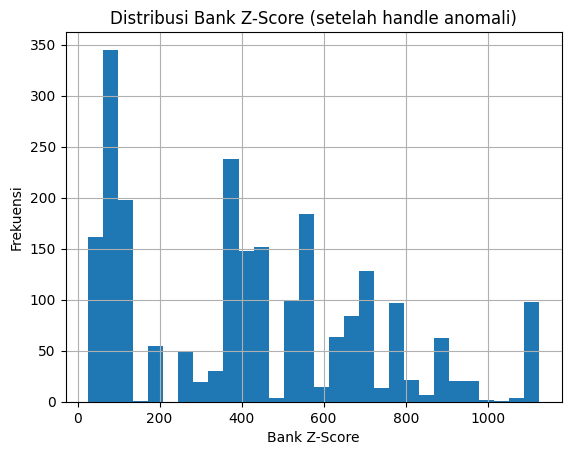

In [215]:
# Cek distribusi Bank Z-Score (setelah handle anomali)

df_clean["bank_zscore"].hist(bins=30)
plt.xlabel("Bank Z-Score")
plt.ylabel("Frekuensi")
plt.title("Distribusi Bank Z-Score (setelah handle anomali)")
plt.show()

In [216]:
# ============================
# 12. Winsorizing / Capping Outlier
# ============================

# Melakukan Winsorizing di percentile 99
cap = df_clean["bank_zscore"].quantile(0.99)
print("Cap P99:", cap)

df_clean["bank_zscore_clean"] = df_clean["bank_zscore"].clip(upper=cap)

Cap P99: 1122.1672862687033


In [217]:
# Cek summary value Bank Z-Score per Bank Symbol (After Handle Data Anomali)

summary_clean = (
    df_clean.groupby("symbol")
      .agg(
          bank_z_min=("bank_zscore", "min"),
          bank_z_max=("bank_zscore", "max"),
          n_obs=("bank_zscore", "count"),
          bank_z_mean=("bank_zscore", "mean"),
          bank_z_std=("bank_zscore", "std"),
          roa_std=("roa", "std"),
      )
      .sort_values("bank_z_max", ascending=False)
)
summary_clean.head(20)
summary_clean.tail(20)

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
MAYA,354.478951,374.174136,55,363.983466,4.641842,0.002693
BTPN,263.253438,369.075091,57,322.692290,31.413106,0.002709
MEGA,303.927997,367.910815,55,362.932052,10.650420,0.002742
BBSI,271.649643,276.320237,43,273.205913,0.938364,0.003681
BNLI,193.287368,208.091984,55,200.189341,3.243366,0.004806
BTPS,129.058641,134.394511,43,132.502177,1.161653,0.007646
AGRS,81.885336,129.592472,47,98.520860,14.500379,0.007610
BEKS,89.596043,127.412216,55,122.622578,9.178783,0.007859
BABP,110.902684,121.477560,53,119.844773,2.379939,0.008246


In [218]:
# Lihat ringkasan khusus BBRI
summary_clean[summary_clean.index == "BBRI"]

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
BBRI,357.016594,391.303535,58,375.109378,8.396794,0.002556


In [219]:
# ============================
# 13. Classify Bank Z-Score Zone
# ============================

import numpy as np
import pandas as pd

z = df_clean["bank_zscore_clean"]

q1 = z.quantile(0.25)
q3 = z.quantile(0.75)

def label_risk(v):
    if pd.isna(v):
        return np.nan
    if v < q1:
        return 2  # High Risk
    elif v < q3:
        return 1  # Medium Risk
    else:
        return 0  # Low Risk

df_clean["bank_zscore_risk_label"] = z.apply(label_risk)

df_clean["bank_zscore_risk"] = (
    df_clean["bank_zscore_risk_label"] == 2
).astype("Int64")

df_clean.head(10)

,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,...,operating_income_ratio,quarter,equity_to_assets,roa_std_bank,bank_zscore,roa_count_bank,mask_bad,bank_zscore_clean,bank_zscore_risk_label,bank_zscore_risk
0,AGRO,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,...,-0.266365,3,0.912805,0.016421,55.654903,51,False,55.654903,2.0,1
1,AGRO,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,...,-0.327832,2,0.948536,0.016421,57.815672,51,False,57.815672,2.0,1
2,AGRO,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,...,0.108593,1,0.961939,0.016421,58.626912,51,False,58.626912,2.0,1
3,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,...,-0.070020,4,0.956354,0.016421,58.288587,51,False,58.288587,2.0,1
4,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,...,0.109110,3,0.991933,0.016421,60.436650,51,False,60.436650,2.0,1
5,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,...,0.748114,2,0.990338,0.016421,60.335679,51,False,60.335679,2.0,1
6,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,...,0.859516,1,0.990938,0.016421,60.368415,51,False,60.368415,2.0,1
7,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,...,0.531961,4,0.992048,0.016421,60.322850,51,False,60.322850,2.0,1
8,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,...,0.604808,3,0.998713,0.016421,60.900981,51,False,60.900981,2.0,1
9,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,...,0.302642,2,0.982304,0.016421,59.685494,51,False,59.685494,2.0,1


In [220]:
# Export cleaned data
output_path = "./data/processed/financial_report_bank_zscore_clean.csv"
df_clean.to_csv(output_path, index=False)

print("Saved to:", output_path)

Saved to: ./data/processed/financial_report_bank_zscore_clean.csv
